In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
Data=pd.read_csv("G:\Supriya\Assignment\winequality-white.csv")
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
Data.shape

(4898, 12)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
Data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

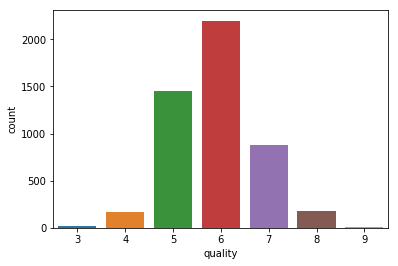

In [6]:
one=sns.countplot(Data['quality'])

In [7]:
Data=Data[Data.quality!=9]
Data=Data[Data.quality!=3]

In [8]:
def outliers(x): 
    return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))
def replace(x):  
    out = x[outliers(x)]
    return x.replace(to_replace = [out.min(),out.max()], 
        value = [np.percentile(x,5),np.percentile(x,95)])

In [9]:
Data = Data.apply(replace,axis=1)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


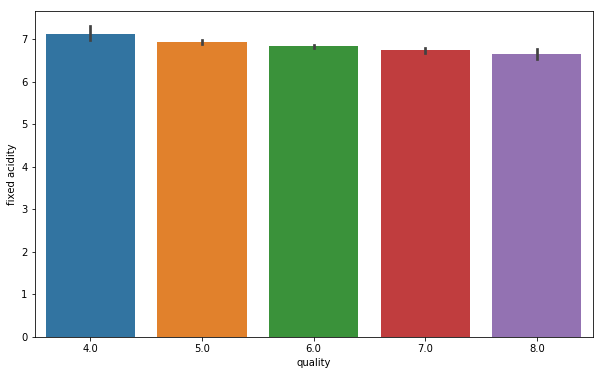

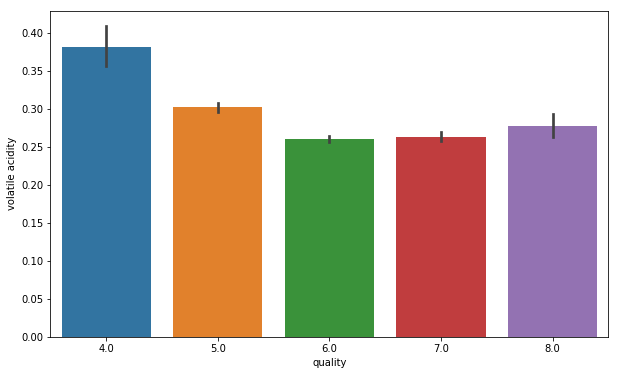

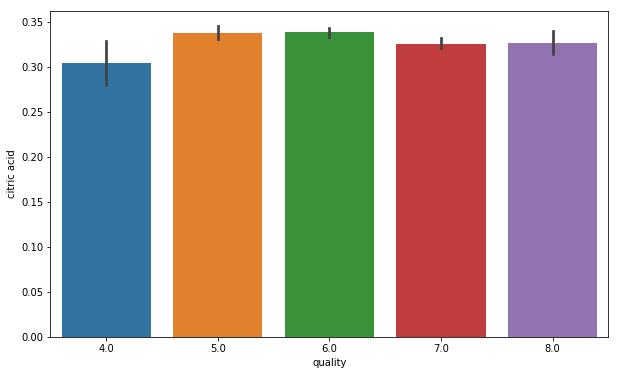

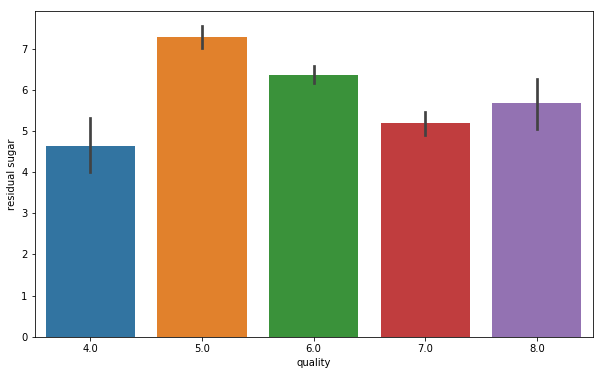

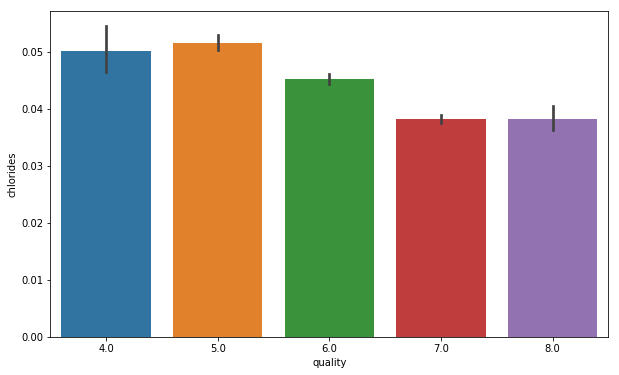

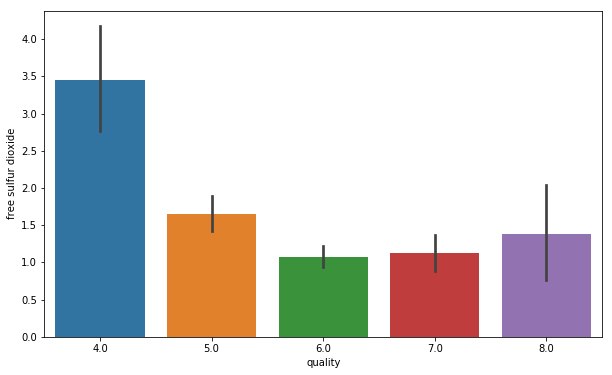

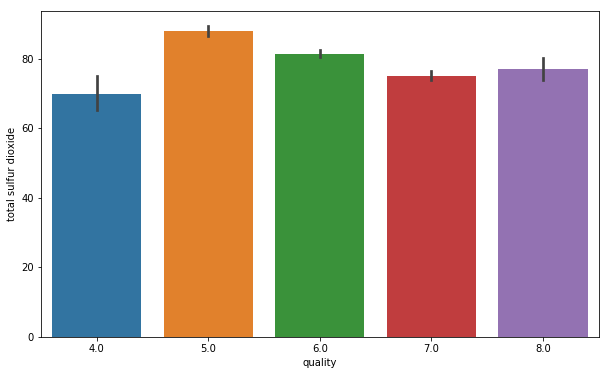

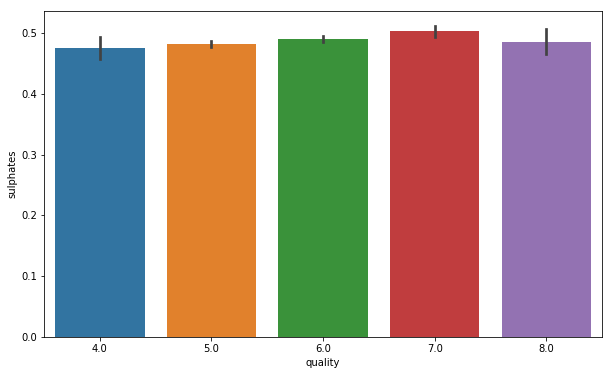

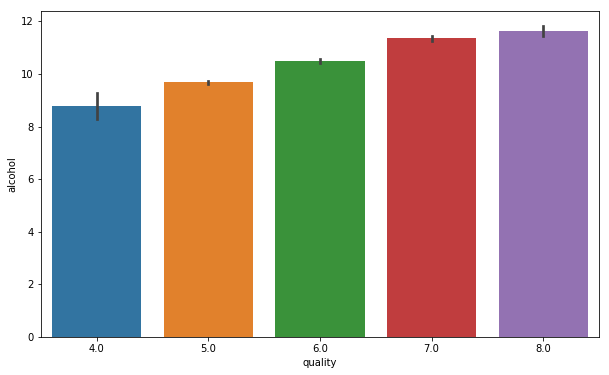

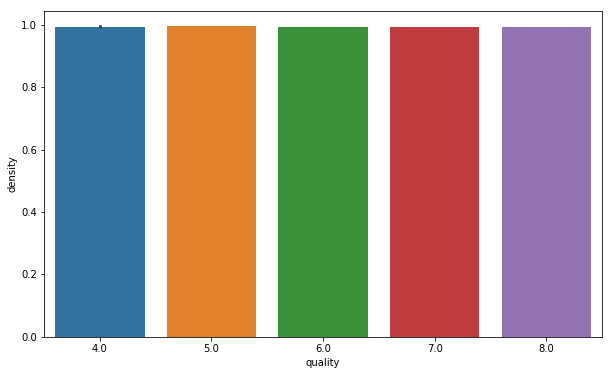

In [10]:
fig = plt.figure(figsize = (10,6))
fixed_acidity=sns.barplot(x = 'quality', y = 'fixed acidity', data = Data)
fixed_acidity.figure.savefig("fixed_acidity.png")
fig = plt.figure(figsize = (10,6))
volatile_acidity=sns.barplot(x = 'quality', y = 'volatile acidity', data = Data)
volatile_acidity.figure.savefig("volatile_acidity.png")
fig = plt.figure(figsize = (10,6))
citric_acid=sns.barplot(x = 'quality', y = 'citric acid', data = Data)
citric_acid.figure.savefig("citric_acid.png")
fig = plt.figure(figsize = (10,6))
residual_sugar=sns.barplot(x = 'quality', y = 'residual sugar', data = Data)
residual_sugar.figure.savefig("residual_sugar.png")
fig = plt.figure(figsize = (10,6))
chlorides=sns.barplot(x = 'quality', y = 'chlorides', data = Data)
chlorides.figure.savefig("chlorides.png")
fig = plt.figure(figsize = (10,6))
free_sulfur_dioxide=sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = Data)
free_sulfur_dioxide.figure.savefig("free_sulfur_dioxide.png")
fig = plt.figure(figsize = (10,6))
total_sulfur_dioxide=sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = Data)
total_sulfur_dioxide.figure.savefig("total_sulfur_dioxide.png")
fig = plt.figure(figsize = (10,6))
sulphates=sns.barplot(x = 'quality', y = 'sulphates', data = Data)
sulphates.figure.savefig("sulphates.png")
fig = plt.figure(figsize = (10,6))
alcohol=sns.barplot(x = 'quality', y = 'alcohol', data = Data)
alcohol.figure.savefig("alcohol.png")
fig = plt.figure(figsize = (10,6))
density=sns.barplot(x = 'quality', y = 'density', data = Data)
density.figure.savefig("density.png")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.026443,0.290072,0.084192,0.021500,0.058353,0.053967,0.264645,-0.423859,-0.015909,-0.059419,-0.108500
volatile acidity,-0.026443,1.000000,-0.150979,0.042790,0.064511,0.079364,0.030476,0.025885,-0.030630,-0.037471,0.011235,-0.194541
citric acid,0.290072,-0.150979,1.000000,0.091237,0.114533,-0.031662,0.132114,0.150472,-0.163871,0.063242,-0.048324,-0.010867
residual sugar,0.084192,0.042790,0.091237,1.000000,0.085295,-0.053748,0.419902,0.792326,-0.193916,-0.029990,-0.275188,-0.099621
chlorides,0.021500,0.064511,0.114533,0.085295,1.000000,-0.046354,0.184134,0.255668,-0.086617,0.012031,-0.248521,-0.209607
free sulfur dioxide,0.058353,0.079364,-0.031662,-0.053748,-0.046354,1.000000,-0.295574,-0.003089,-0.090530,-0.049446,-0.090392,-0.078015
total sulfur dioxide,0.053967,0.030476,0.132114,0.419902,0.184134,-0.295574,1.000000,0.510440,-0.002259,0.118277,-0.200981,-0.120428
density,0.264645,0.025885,0.150472,0.792326,0.255668,-0.003089,0.510440,1.000000,-0.090886,0.072821,-0.502066,-0.309837
pH,-0.423859,-0.030630,-0.163871,-0.193916,-0.086617,-0.090530,-0.002259,-0.090886,1.000000,0.157146,0.092532,0.099749
sulphates,-0.015909,-0.037471,0.063242,-0.029990,0.012031,-0.049446,0.118277,0.072821,0.157146,1.000000,0.004746,0.054308


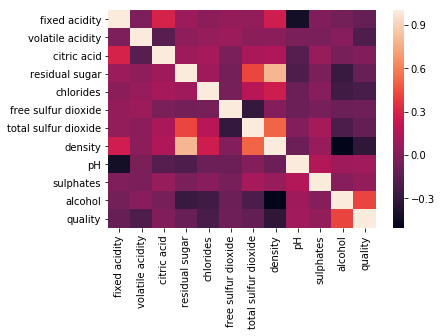

In [11]:
corr = Data.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
corr

In [12]:
Data = Data.drop('sulphates', axis = 1)
Data = Data.drop('citric acid', axis = 1)
Data = Data.drop('fixed acidity', axis = 1)
Data = Data.drop('density', axis = 1)

In [19]:
X = Data.drop('quality', axis = 1)
y = Data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [21]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         4.0       0.80      0.12      0.21        33
         5.0       0.69      0.67      0.68       313
         6.0       0.64      0.77      0.70       433
         7.0       0.72      0.55      0.62       166
         8.0       0.94      0.50      0.65        30

   micro avg       0.67      0.67      0.67       975
   macro avg       0.76      0.52      0.57       975
weighted avg       0.68      0.67      0.66       975



In [22]:
print(confusion_matrix(y_test, pred_rfc))

[[  4  19  10   0   0]
 [  1 211  98   3   0]
 [  0  73 334  26   0]
 [  0   4  70  91   1]
 [  0   1   7   7  15]]


In [23]:
accuracy_score(y_test,pred_rfc)

0.6717948717948717

In [18]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
alcohol,0.172113
total sulfur dioxide,0.151113
free sulfur dioxide,0.146553
residual sugar,0.141225
pH,0.132279
chlorides,0.129540
volatile acidity,0.127178


In [28]:
modelm = MultinomialNB()
modelm.fit(X_train, y_train)
y_predict = modelm.predict(X_test)
print(str(modelm.score(X_test, y_test)))
mse = mean_squared_error(y_predict, y_test)
print(str(mse ** 0.5))
print(accuracy_score(y_test,y_predict))

0.4328205128205128
0.9860566374745886
0.4328205128205128


In [25]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(model.score(X_test, y_test))
print(mean_squared_error(y_predict, y_test) ** 0.5)

0.5087179487179487
0.8747160711500648


In [29]:
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X_train, y_train)
predicted= model.predict(X_test)
model.score(X_train, y_train)
confusion_matrix(predicted,y_test)
print(classification_report(y_test, predicted))
print(accuracy_score(y_test,predicted))

              precision    recall  f1-score   support

         4.0       1.00      0.03      0.06        33
         5.0       0.58      0.42      0.49       313
         6.0       0.50      0.76      0.60       433
         7.0       0.46      0.23      0.31       166
         8.0       0.00      0.00      0.00        30

   micro avg       0.51      0.51      0.51       975
   macro avg       0.51      0.29      0.29       975
weighted avg       0.52      0.51      0.48       975

0.5138461538461538


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
